In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from keras.datasets import cifar100

(X_train_hw, Y_train_hw), (X_test_hw, Y_test_hw) = cifar100.load_data()

print('Train: X=%s, y=%s' % (X_train_hw.shape, Y_train_hw.shape))
print('Test: X=%s, y=%s' % (X_test_hw.shape, Y_test_hw.shape))

169017344/169001437 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


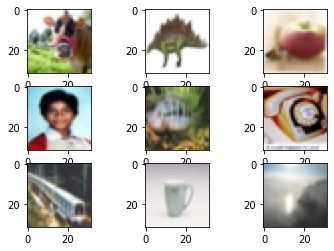

In [5]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train_hw[i])
plt.show()

In [6]:
y_train_hw = tf.keras.utils.to_categorical(Y_train_hw)
y_test_hw = tf.keras.utils.to_categorical(Y_test_hw)
print(y_train_hw.shape)
print(y_test_hw.shape)
x_train_hw = X_train_hw/255.
x_test_hw = X_test_hw/255.
print(x_train_hw.shape)
print(x_test_hw.shape)

(50000, 100)
(10000, 100)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
model_hw = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(256, activation=tf.nn.relu),
                             tf.keras.layers.Dense(256, activation=tf.nn.relu),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(100, activation='softmax')
])
model_hw.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_hw.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         7

In [8]:
history_hw = model_hw.fit(x_train_hw, y_train_hw, epochs=100, batch_size=256, validation_data=(x_test_hw, y_test_hw))

Epoch 1/100
196/196 [==============================] - 41s 46ms/step - loss: 4.6051 - accuracy: 0.0099 - val_loss: 4.6049 - val_accuracy: 0.0098
Epoch 2/100
196/196 [==============================] - 8s 41ms/step - loss: 4.6048 - accuracy: 0.0096 - val_loss: 4.6047 - val_accuracy: 0.0099
Epoch 3/100
196/196 [==============================] - 8s 41ms/step - loss: 4.6046 - accuracy: 0.0116 - val_loss: 4.6045 - val_accuracy: 0.0113
Epoch 4/100
196/196 [==============================] - 8s 41ms/step - loss: 4.6044 - accuracy: 0.0120 - val_loss: 4.6042 - val_accuracy: 0.0118
Epoch 5/100
196/196 [==============================] - 8s 41ms/step - loss: 4.6041 - accuracy: 0.0131 - val_loss: 4.6039 - val_accuracy: 0.0127
Epoch 6/100
196/196 [==============================] - 8s 41ms/step - loss: 4.6037 - accuracy: 0.0133 - val_loss: 4.6034 - val_accuracy: 0.0132
Epoch 7/100
196/196 [==============================] - 8s 41ms/step - loss: 4.6032 - accuracy: 0.0136 - val_loss: 4.6029 - val_accuracy

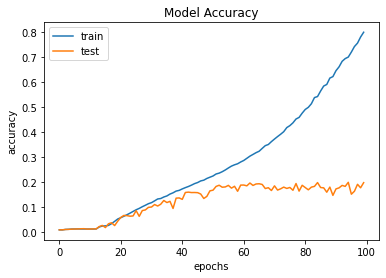

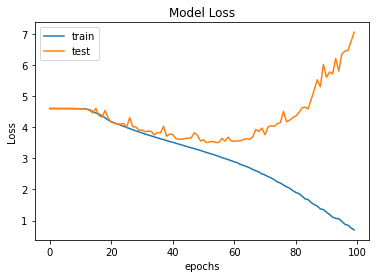

In [9]:
plt.plot(history_hw.history['accuracy'])
plt.plot(history_hw.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_hw.history['loss'])
plt.plot(history_hw.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.1)),
                             tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.1)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.1)),
                             tf.keras.layers.Dense(100, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)        

In [11]:
history=model.fit(x_train_hw, y_train_hw, epochs=100, batch_size=256, validation_data=(x_test_hw, y_test_hw))

Epoch 1/100
196/196 [==============================] - 11s 48ms/step - loss: 16.1956 - accuracy: 0.0204 - val_loss: 4.3952 - val_accuracy: 0.0260
Epoch 2/100
196/196 [==============================] - 9s 44ms/step - loss: 4.3031 - accuracy: 0.0362 - val_loss: 4.2520 - val_accuracy: 0.0430
Epoch 3/100
196/196 [==============================] - 9s 44ms/step - loss: 4.1737 - accuracy: 0.0550 - val_loss: 4.0897 - val_accuracy: 0.0665
Epoch 4/100
196/196 [==============================] - 9s 44ms/step - loss: 4.0918 - accuracy: 0.0652 - val_loss: 4.0390 - val_accuracy: 0.0766
Epoch 5/100
196/196 [==============================] - 9s 44ms/step - loss: 4.0113 - accuracy: 0.0786 - val_loss: 3.9327 - val_accuracy: 0.0955
Epoch 6/100
196/196 [==============================] - 9s 44ms/step - loss: 3.9457 - accuracy: 0.0883 - val_loss: 3.8968 - val_accuracy: 0.0956
Epoch 7/100
196/196 [==============================] - 9s 44ms/step - loss: 3.8730 - accuracy: 0.0988 - val_loss: 3.8216 - val_accurac

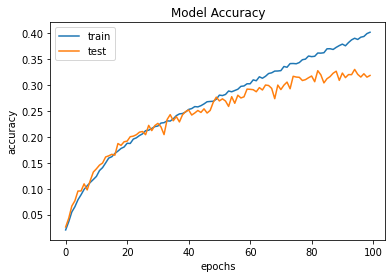

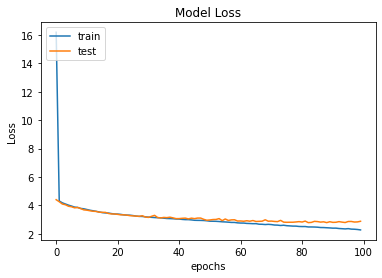

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()